# Import

In [12]:
# Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in CSV

In [4]:
# **Need to figure out how to automate generated csv's into analysis section.**
df = pd.read_csv('Lady Gaga_info.csv')

## EDA

In [5]:
eda = df.describe()
eda

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Loudness,Speechiness,Tempo,Valence
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,0.264262,0.588754,208283.298039,0.640522,0.059821,-7.182510,0.086852,117.539502,0.474193
std,0.330535,0.174868,71346.267505,0.237315,0.204159,4.425958,0.147128,26.963646,0.231892
min,0.000030,0.000000,10760.000000,0.018400,0.000000,-27.194000,0.000000,0.000000,0.000000
25%,0.005055,0.516000,177293.000000,0.472000,0.000000,-7.650000,0.034800,104.549500,0.324500
50%,0.056200,0.608000,220707.000000,0.694000,0.000007,-5.972000,0.045000,120.828000,0.457000
75%,0.570000,0.704000,252393.500000,0.834500,0.000302,-4.541000,0.067400,129.717000,0.670000
max,0.975000,0.908000,575240.000000,0.979000,0.981000,-2.133000,0.952000,202.623000,0.966000


## Correlation Matrix

In [6]:
corrMatrix = df.corr()
corrMatrix

C:\Users\hskim\AppData\Local\Temp\ipykernel_4912\1418874775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


,Acousticness,Danceability,Duration,Energy,Instrumentalness,Loudness,Speechiness,Tempo,Valence
Acousticness,1.000000,-0.552827,-0.362269,-0.711169,0.068195,-0.557616,0.202545,-0.253985,-0.245750
Danceability,-0.552827,1.000000,0.134503,0.487555,-0.283824,0.522441,0.052318,0.216770,0.537506
Duration,-0.362269,0.134503,1.000000,0.264941,-0.110463,0.477686,-0.504278,0.307563,-0.114886
Energy,-0.711169,0.487555,0.264941,1.000000,-0.214013,0.705693,-0.143768,0.391190,0.440935
Instrumentalness,0.068195,-0.283824,-0.110463,-0.214013,1.000000,-0.390855,-0.056697,-0.044709,-0.328321
Loudness,-0.557616,0.522441,0.477686,0.705693,-0.390855,1.000000,-0.520475,0.349836,0.387573
Speechiness,0.202545,0.052318,-0.504278,-0.143768,-0.056697,-0.520475,1.000000,-0.065580,0.126666
Tempo,-0.253985,0.216770,0.307563,0.391190,-0.044709,0.349836,-0.065580,1.000000,0.276105
Valence,-0.245750,0.537506,-0.114886,0.440935,-0.328321,0.387573,0.126666,0.276105,1.000000


## Histogram

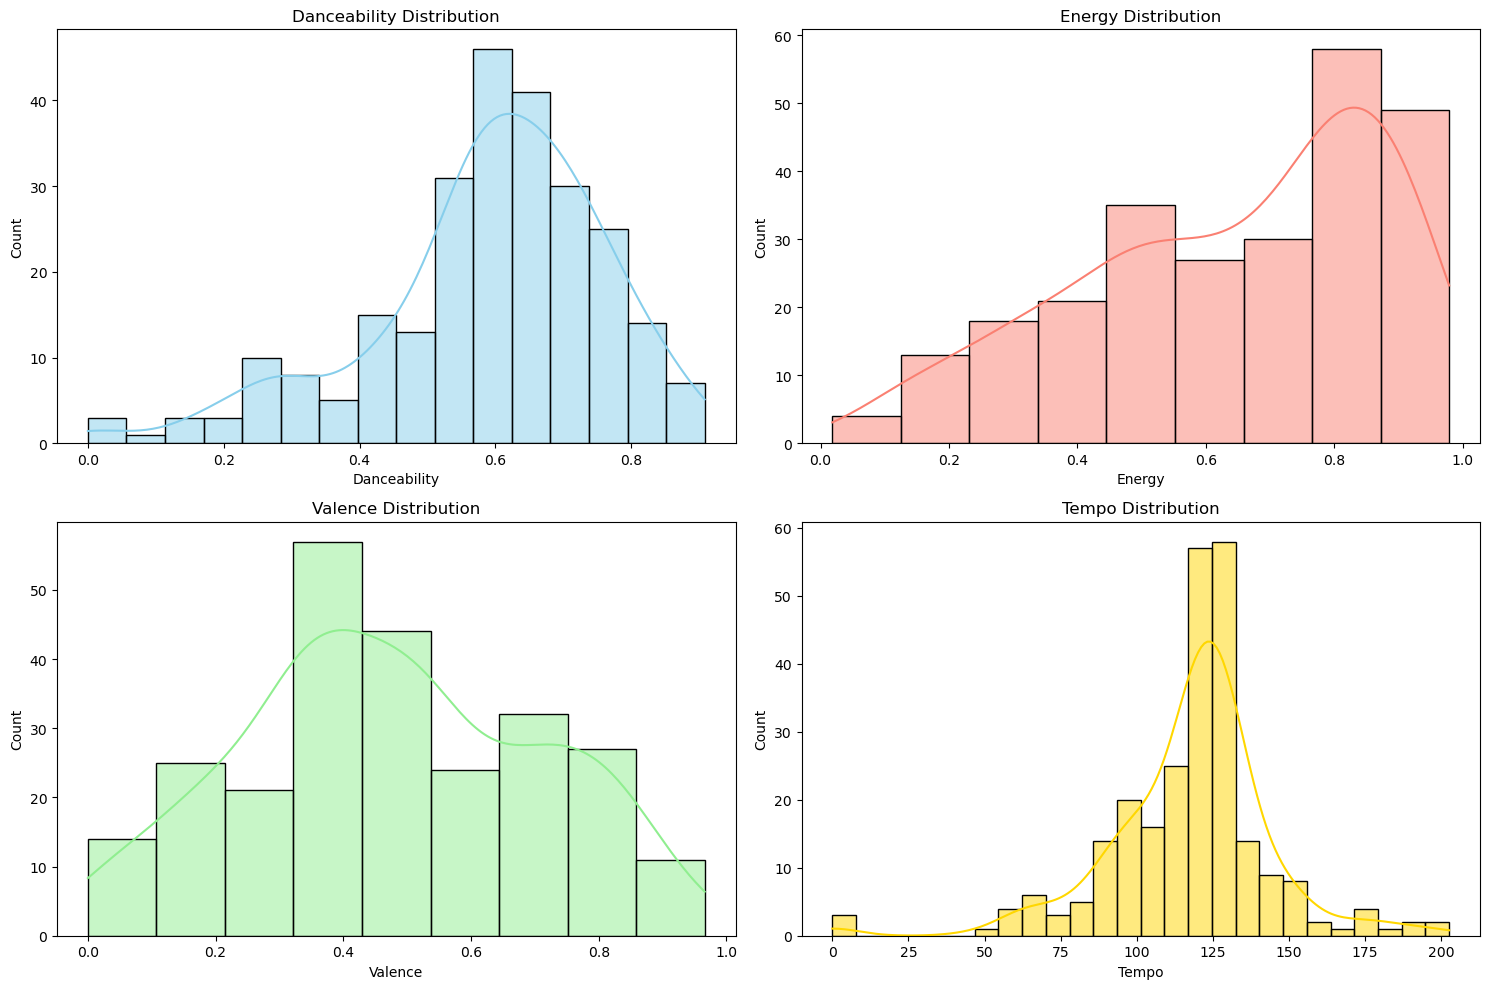

In [7]:
# Histogram w/ Kernel Density Estimate (KDE)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Danceability'], ax=axes[0, 0], kde=True, color='skyblue')
sns.histplot(df['Energy'], ax=axes[0, 1], kde=True, color='salmon')
sns.histplot(df['Valence'], ax=axes[1, 0], kde=True, color='lightgreen')
sns.histplot(df['Tempo'], ax=axes[1, 1], kde=True, color='gold')

axes[0, 0].set_title('Danceability Distribution')
axes[0, 1].set_title('Energy Distribution')
axes[1, 0].set_title('Valence Distribution')
axes[1, 1].set_title('Tempo Distribution')

plt.tight_layout()

## Pairplot

d:\School\Code\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


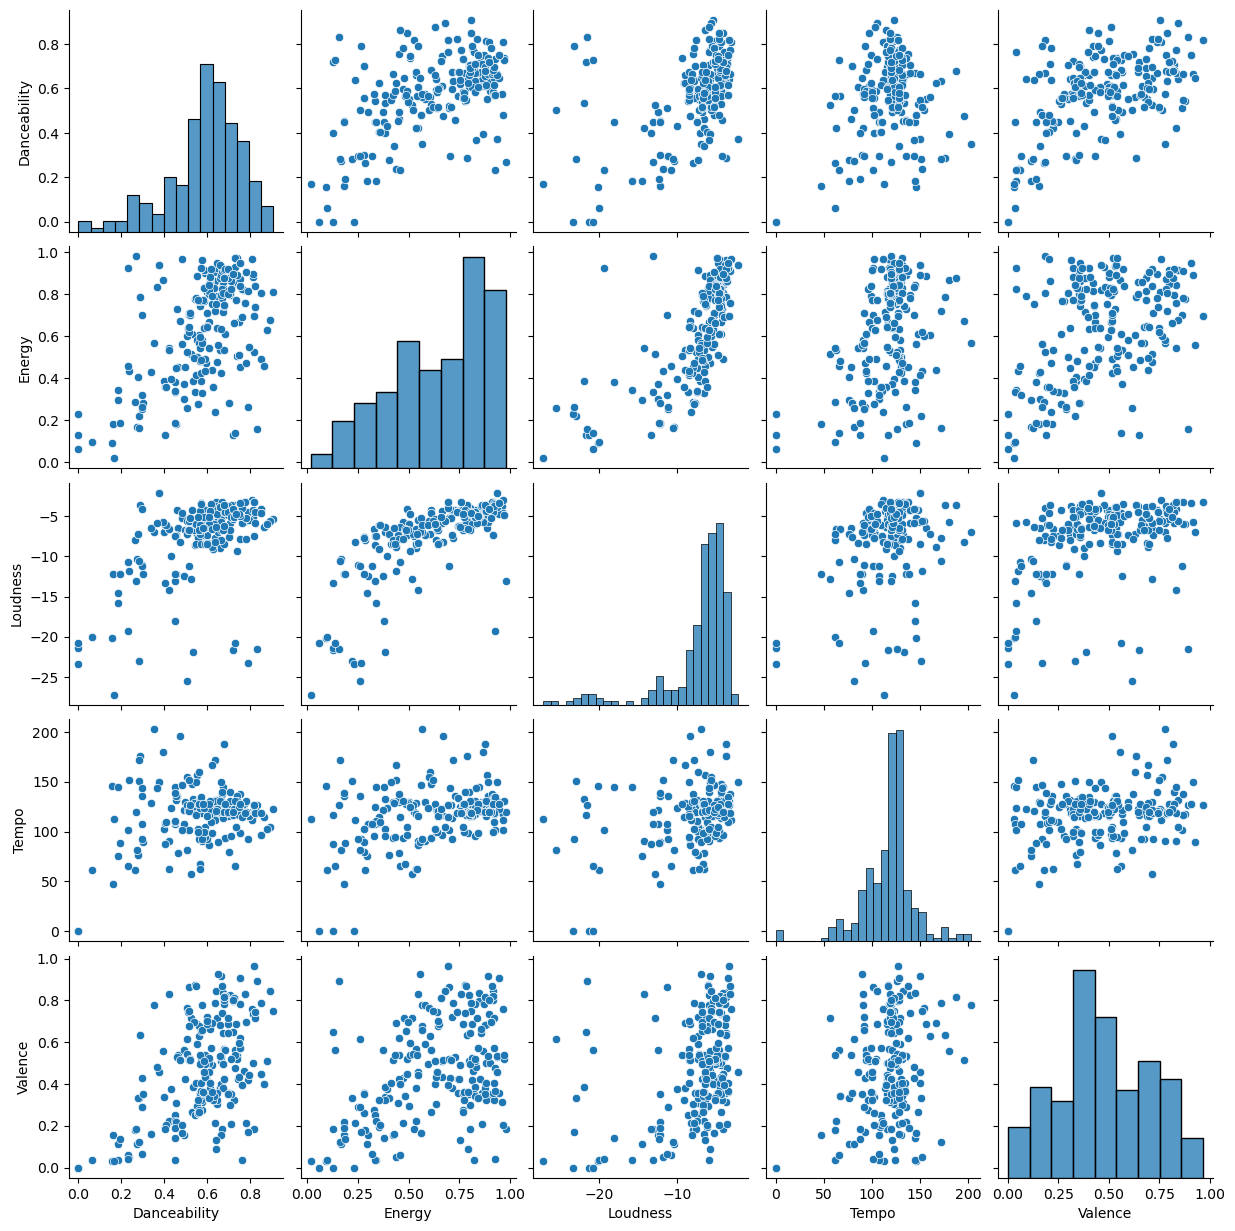

In [8]:
pairplot = sns.pairplot(df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Valence']])
pairplot

## Heatmap

C:\Users\hskim\AppData\Local\Temp\ipykernel_4912\430802047.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True)


<Axes: >

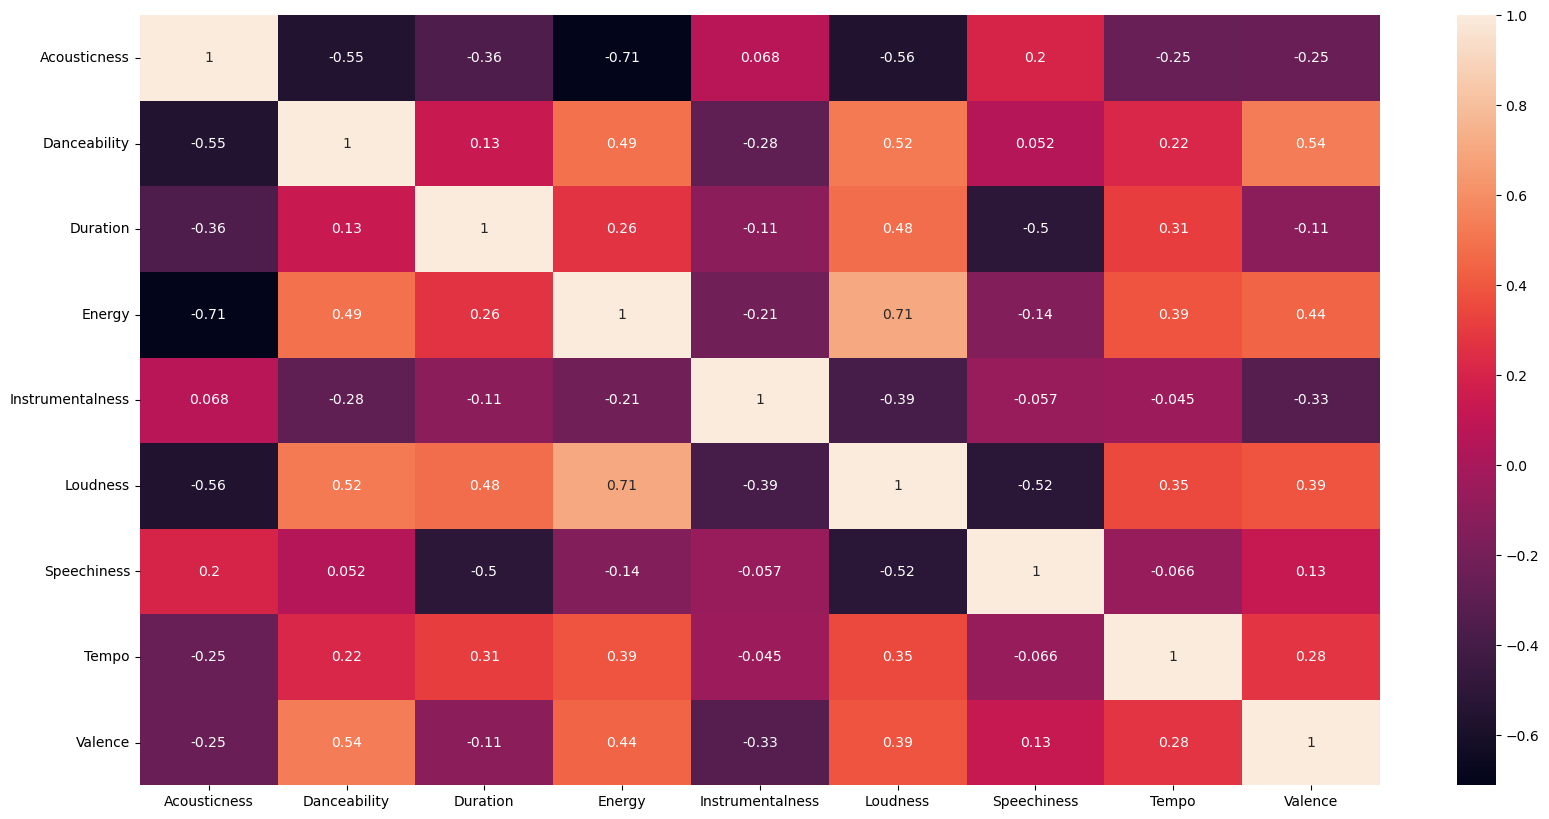

In [9]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap

## Hexplot

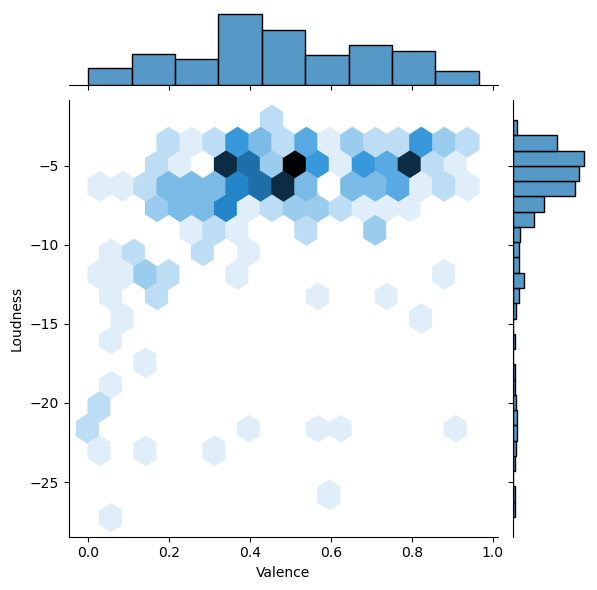

In [10]:
hexplot = sns.jointplot(x='Valence', y='Loudness', data=df, kind='hex')
hexplot

## Radar Chart

# Statistical Analysis

In [34]:
from scipy.stats import ttest_ind

# Based on values of "Valence"
# Binary representation of Valence into happy vs sad songs.
happy = df[df['Valence'] > 0.5]
sad = df[df['Valence'] <= 0.5]

# Comparing signifcance of dancebaility between happy and sad songs.
t_statistic, pValue = ttest_ind(happy['Danceability'], sad['Danceability'])

if pValue < 0.05:
    print("There is a significant difference in danceability between happy and sad songs.")
    
else:
    print("There is no significant difference in danceability between happy and sad songs.")

There is a significant difference in danceability between happy and sad songs.


In [35]:
# t test for each pair of songs in the csv
# Comparison to see whether or not difference in audio features (all columns in the CSV) between songs are statistically significant.
# Excludes "Track Name" from comparison for obvious reasons.

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message="invalid value encountered in scalar multiply")

results_df = pd.DataFrame(columns=["Comparison", "Audio Feature", "Result"])
audio_features = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

for feature in audio_features:

    for i in range(len(df) - 1):

        for j in range(i + 1, len(df)):

            song1 = df.loc[i, 'Track Name']
            song2 = df.loc[j, 'Track Name']

            feature1 = df.loc[i, feature]
            feature2 = df.loc[j, feature]
            
            # RuntimeWarning: invalid value encountered in scalar multiply var *= np.divide(n, n-ddof)  # to avoid error on division by zero
            # Checks for precision loss and division by zero
            # Supressed warnings, seems to be because of scipy?
            if (feature1 == feature2) or (abs(feature1 - feature2) < 1e-10):
                result = "Nearly Identical"

            elif feature1 == 0 or feature2 == 0:
                result = "Division by Zero"

            else:
                t_statistic, pValue = ttest_ind([feature1], [feature2])

            if pValue < 0.05:
                result = "Significant"

            else:
                result = "Not Significant"

            test_description = f"{song1} vs {song2}"
            results_df = results_df.append({"Comparison": test_description, "Audio Feature": feature, "Result": result}, ignore_index=True)

results_df

,Comparison,Audio Feature,Result
0,Main Titles (You’ve Been Called Back to Top Gu...,Acousticness,Not Significant
1,Main Titles (You’ve Been Called Back to Top Gu...,Acousticness,Not Significant
2,Main Titles (You’ve Been Called Back to Top Gu...,Acousticness,Not Significant
3,Main Titles (You’ve Been Called Back to Top Gu...,Acousticness,Not Significant
4,Main Titles (You’ve Been Called Back to Top Gu...,Acousticness,Not Significant
...,...,...,...
259075,Brown Eyes vs Summerboy,Valence,Not Significant
259076,Brown Eyes vs Disco Heaven,Valence,Not Significant
259077,I Like It Rough vs Summerboy,Valence,Not Significant
259078,I Like It Rough vs Disco Heaven,Valence,Not Significant


In [36]:
checkSig = results_df[results_df["Result"] == "Significant"]

checkSig

,Comparison,Audio Feature,Result
